# Housing Price Predictions

This project's objective is to find the best machine learning model to predict housing prices from King County.

The data was gathered from Kaggle.

In [6]:
# compulsory
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# optional libraries (added as needed)
import seaborn as sns
from scipy.stats import chi2_contingency
from statsmodels.stats.anova import anova_lm
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

# my libraries (added as needed)
import univariate as uni
import bivariate as bi
import data_clean as clean

In [7]:
dataset = pd.read_csv('kc_house_data.csv')   # read the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [8]:
# deleting variables for the following reasons:
del dataset['id']   # not useful
del dataset['date']   # out of scope
del dataset['sqft_living15']   # not defined by documentation
del dataset['sqft_lot15']   # not defined by documentation

## Univariate Analysis

Though univariate analysis was used, it was deleted from this section to shorten the notebook. Some of it will come into play during data cleaning and feature engineering.

In [9]:
total_count = len(dataset)   # for univariate functions

# categorizing the kind of variable each one is:
df_category = pd.DataFrame(index = dataset.columns)
df_category['in/dependent'] = ['i','d','d','d','d','d','d','d','d','d','d','d','d','d','d','d','d']
df_category['category'] = ['continuous', 'categorical', 'categorical', 'continuous', 'continuous', 'categorical',
                          'categorical', 'categorical', 'categorical', 'categorical', 'continuous', 'continuous',
                          'categorical', 'categorical', 'categorical', 'continuous', 'continuous']
df_category

,in/dependent,category
price,i,continuous
bedrooms,d,categorical
bathrooms,d,categorical
sqft_living,d,continuous
sqft_lot,d,continuous
floors,d,categorical
waterfront,d,categorical
view,d,categorical
condition,d,categorical
grade,d,categorical


## Bivariate Analysis

### Continuous - Continuous

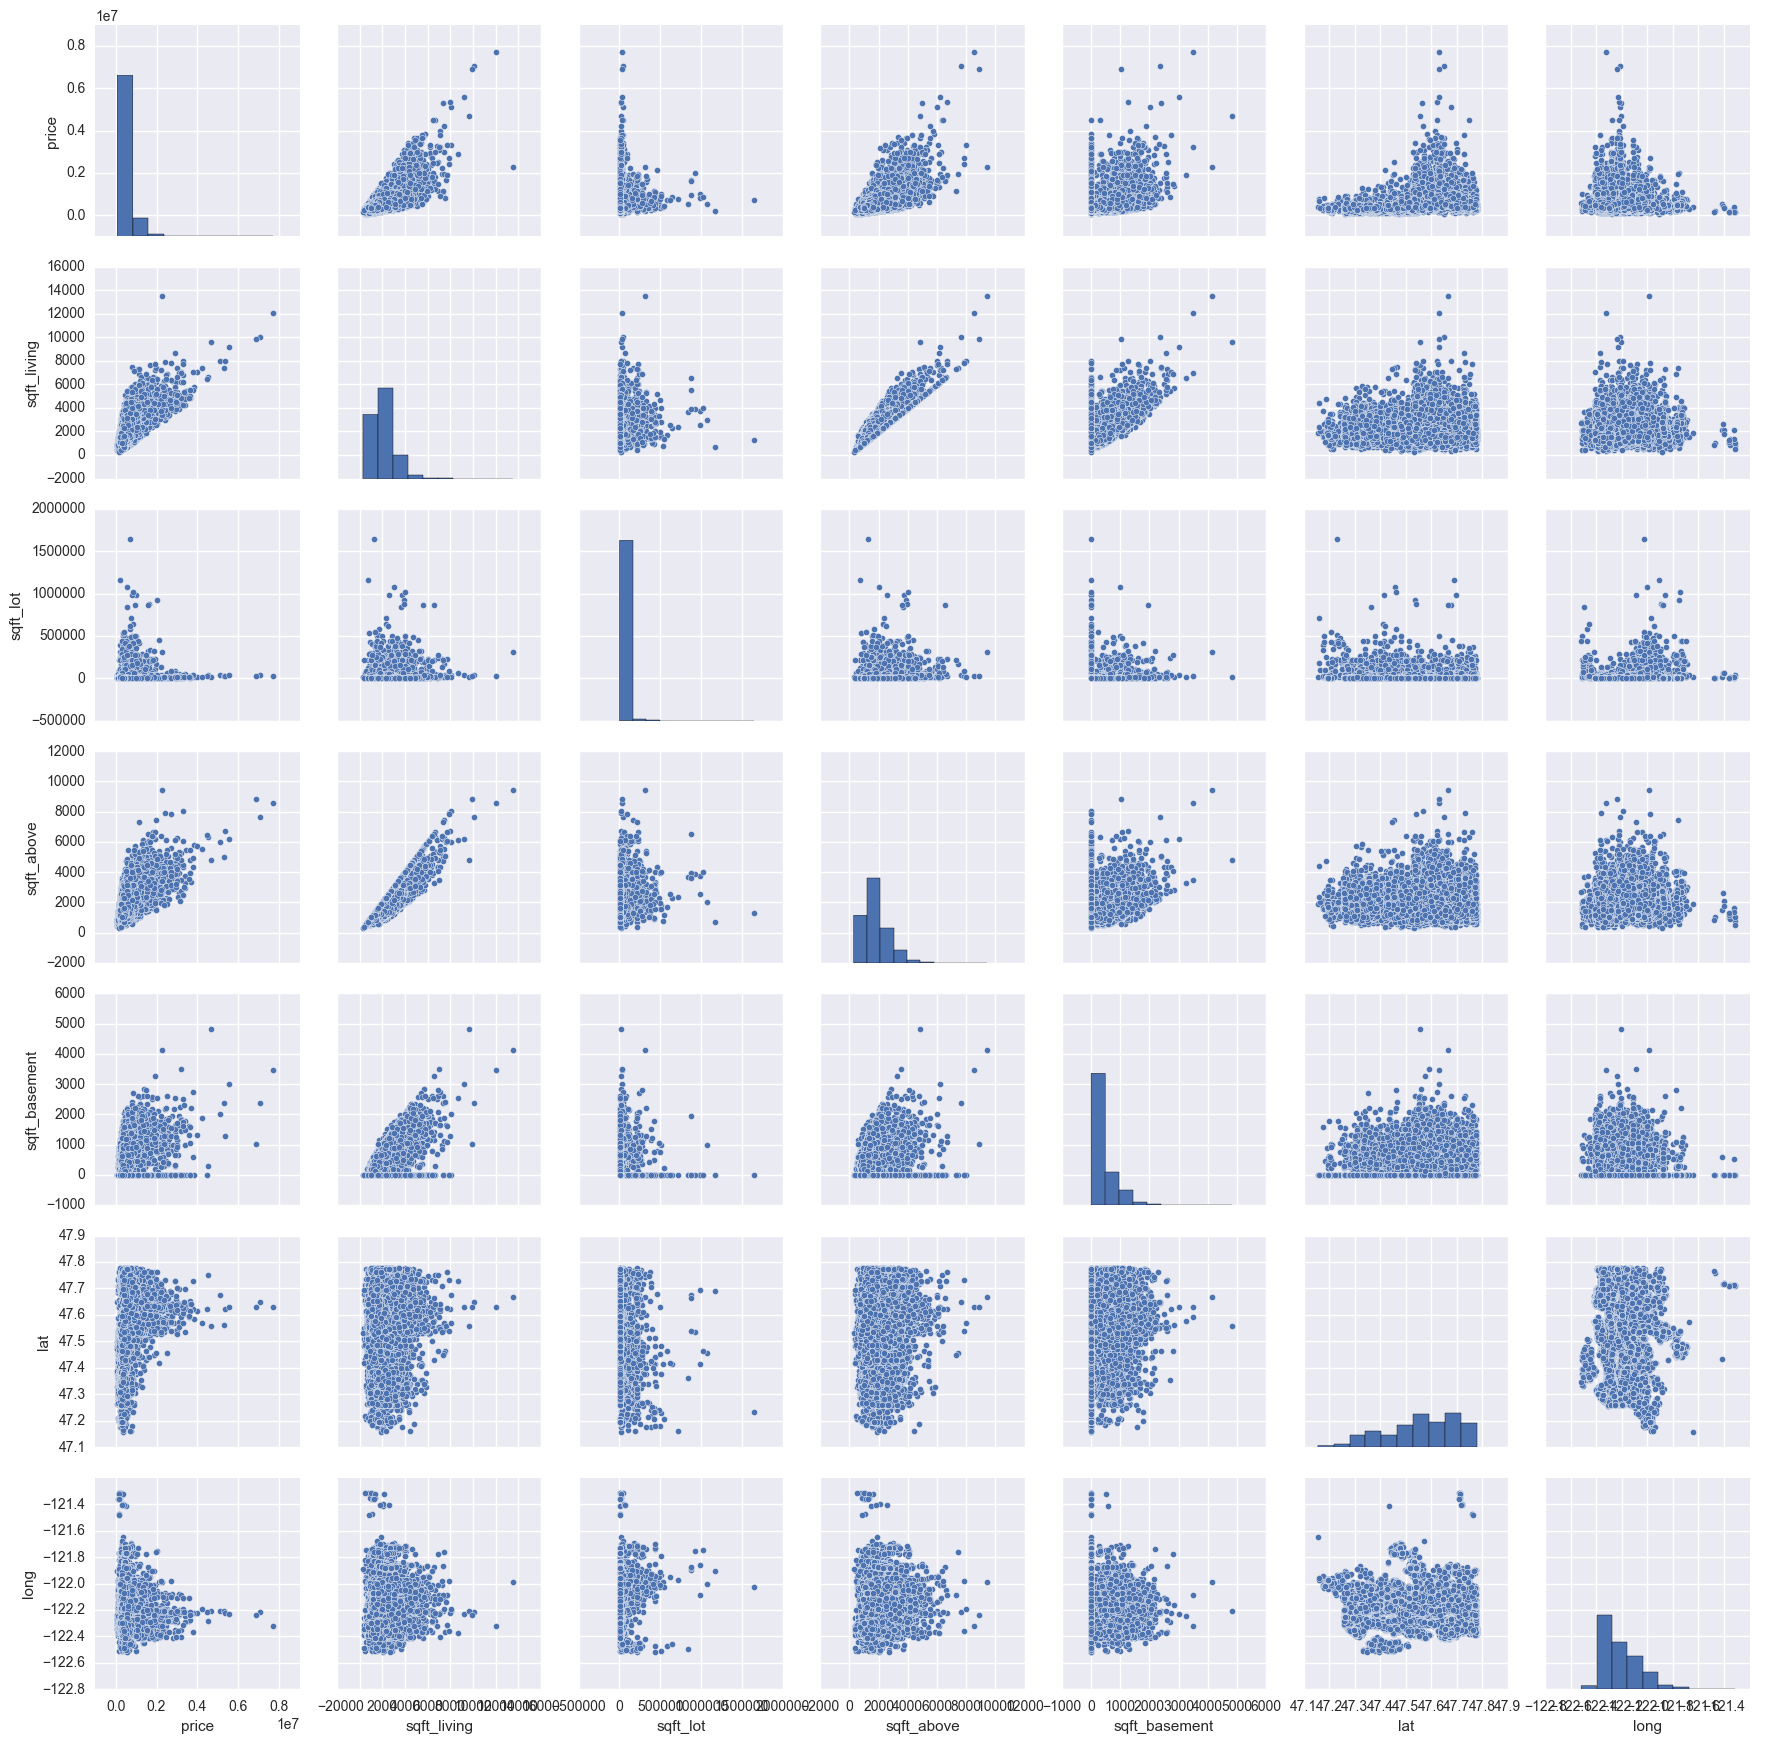

In [10]:
sns.set()
sns.pairplot(dataset[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long']])

In [11]:
bi.pearson_table(dataset[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long']])

                          price    sqft_living          sqft_lot  \
price                (1.0, 0.0)   (0.702, 0.0)     (0.0897, 0.0)   
sqft_living        (0.702, 0.0)     (1.0, 0.0)     (0.1728, 0.0)   
sqft_lot          (0.0897, 0.0)  (0.1728, 0.0)        (1.0, 0.0)   
sqft_above        (0.6056, 0.0)  (0.8766, 0.0)     (0.1835, 0.0)   
sqft_basement     (0.3238, 0.0)   (0.435, 0.0)  (0.0153, 0.0246)   
lat                (0.307, 0.0)  (0.0525, 0.0)    (-0.0857, 0.0)   
long           (0.0216, 0.0015)  (0.2402, 0.0)     (0.2295, 0.0)   

                      sqft_above     sqft_basement                lat  \
price              (0.6056, 0.0)     (0.3238, 0.0)       (0.307, 0.0)   
sqft_living        (0.8766, 0.0)      (0.435, 0.0)      (0.0525, 0.0)   
sqft_lot           (0.1835, 0.0)  (0.0153, 0.0246)     (-0.0857, 0.0)   
sqft_above            (1.0, 0.0)    (-0.0519, 0.0)  (-0.0008, 0.9045)   
sqft_basement     (-0.0519, 0.0)        (1.0, 0.0)      (0.1105, 0.0)   
lat            (-

Looking at the plots and pearson correlation coefficients, the variables that correlate with price and their strength are:
- sqft_living (strong, positive)
- sqft_lot (no relationship)
- sqft_above (strong, positive)
- sqft_basement (weak, positive)
- lat (weak, positive)
- long (no relationship)

It is likely that sqft_lot and long will not be great predictors of price.

### Categorical - Categorical

In [12]:
bi.chi2_table(dataset[['yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']])

                          yr_built          yr_renovated             zipcode  \
yr_built                (0.0, 1.0)  (21592843.8072, 0.0)    (9522.0069, 1.0)   
yr_renovated  (21592843.8072, 0.0)                   NaN  (40518099.95, 0.0)   
zipcode           (9522.0069, 1.0)    (40518099.95, 0.0)          (0.0, 1.0)   
lat                (246.1246, 1.0)   (2667839.2685, 0.0)       (8.1553, 1.0)   
long                           NaN                   NaN                 NaN   

                              lat long  
yr_built          (246.1246, 1.0)  NaN  
yr_renovated  (2667839.2685, 0.0)  NaN  
zipcode             (8.1553, 1.0)  NaN  
lat                    (0.0, 1.0)  NaN  
long                          NaN  NaN  


### Continuous - Categorical

In [13]:
# only if you need pairwise tukey hsd, otherwise use next code
bi.anova(dataset.price, dataset.condition)

(46774.132165640724, 0.0)
    Multiple Comparison of Means - Tukey HSD,FWER=0.05   
group1 group2   meandiff     lower        upper    reject
---------------------------------------------------------
  1      2     -7144.5213 -204636.9684 190347.9258 False 
  1      3    207580.9115  25148.1544  390013.6686  True 
  1      4    186768.7234  4049.9727    369487.474  True 
  1      5    277986.4227  94148.3717  461824.4737  True 
  2      3    214725.4328 138151.4626   291299.403  True 
  2      4    193913.2447 116660.3879  271166.1015  True 
  2      5     285130.944 205266.7403  364995.1477  True 
  3      4    -20812.1881 -36510.8531   -5113.5231  True 
  3      5     70405.5112  44778.6653   96032.3571  True 
  4      5     91217.6993  63628.4587   118806.94   True 
---------------------------------------------------------


In [14]:
categorical_variables = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
                         'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode']

for var in categorical_variables:
    print anova_lm(sm.ols('price ~ ' + var, data = dataset).fit(), typ = 2)
    print '\n'

                sum_sq       df            F  PR(>F)
bedrooms  2.769586e+14      1.0  2270.655234     0.0
Residual  2.635958e+15  21611.0          NaN     NaN


                 sum_sq       df            F  PR(>F)
bathrooms  8.032933e+14      1.0  8228.943228     0.0
Residual   2.109623e+15  21611.0          NaN     NaN


                sum_sq       df            F         PR(>F)
floors    1.920868e+14      1.0  1525.706143  1.581010e-322
Residual  2.720830e+15  21611.0          NaN            NaN


                  sum_sq       df            F  PR(>F)
waterfront  2.066792e+14      1.0  1650.463036     0.0
Residual    2.706238e+15  21611.0          NaN     NaN


                sum_sq       df            F  PR(>F)
view      4.597809e+14      1.0  4050.458981     0.0
Residual  2.453136e+15  21611.0          NaN     NaN


                 sum_sq       df          F        PR(>F)
condition  3.851399e+12      1.0  28.611455  8.935654e-08
Residual   2.909065e+15  21611.0        NaN      

In [15]:
print anova_lm(sm.ols('price ~ condition + bedrooms + bathrooms + floors + waterfront + view + grade + yr_built + yr_renovated + zipcode', data = dataset).fit(), typ = 2)

                    sum_sq       df            F         PR(>F)
condition     2.233879e+12      1.0    42.369710   7.720991e-11
bedrooms      6.441512e+09      1.0     0.122175   7.266904e-01
bathrooms     7.262220e+13      1.0  1377.416576  2.467582e-292
floors        7.189677e+11      1.0    13.636575   2.223679e-04
waterfront    4.836223e+13      1.0   917.280632  2.276288e-197
view          3.344590e+13      1.0   634.364310  5.492299e-138
grade         5.180017e+14      1.0  9824.876565   0.000000e+00
yr_built      1.528040e+14      1.0  2898.215754   0.000000e+00
yr_renovated  1.018126e+11      1.0     1.931067   1.646560e-01
zipcode       1.140889e+12      1.0    21.639099   3.310246e-06
Residual      1.138933e+15  21602.0          NaN            NaN


All of the categorical variables are significant when tested alone, but together bedrooms and yr_renovated are not statistically significant.

## Linear Regression (OLS / statsmodels)

### First regression, no feature engineering

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2701.
Date:                Fri, 12 May 2017   Prob (F-statistic):               0.00
Time:                        19:49:57   Log-Likelihood:            -2.3572e+05
No. Observations:               17290   AIC:                         4.715e+05
Df Residuals:                   17274   BIC:                         4.716e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
constant       1.147e+07   3.23e+06      3.550

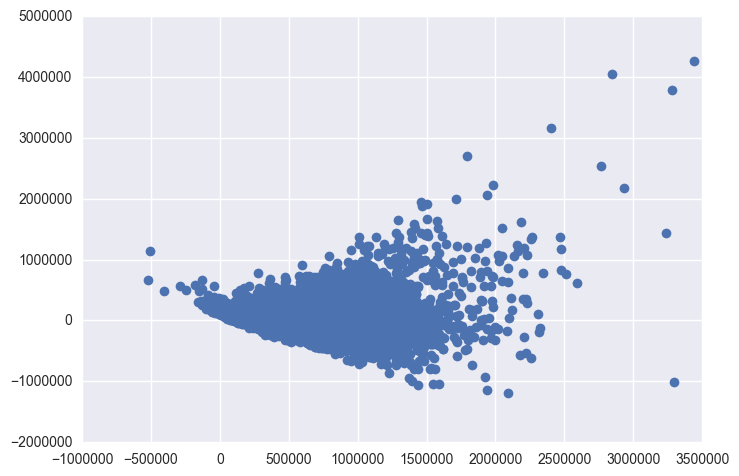

In [16]:
def reg_prep(dataset):
    dataset = dataset.sample(frac=1).reset_index(drop=True)
    
    X = pd.DataFrame(dataset.iloc[:,1:])
    y = pd.DataFrame(dataset.iloc[:,0])
    
    X.insert(0, 'constant', 1)   # insert constant column
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
    lm_sm = sm.OLS(y_train, X_train).fit()
    print lm_sm.summary()
    print plt.plot(lm_sm.fittedvalues, lm_sm.resid, 'o')   # residual plot

reg_prep(dataset)

## Feature Engineering

In [17]:
# dataset to save the best cleaned data
dataset_clean = dataset.copy(deep = True)

# dataset to experiment with data cleaning
dataset_clean_temp = dataset_clean.copy(deep = True)
dataset_clean_temp.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


Before working with every variable sequentially, a few areas of improvement should be addressed first:
1. missing values
2. categorical data -> numerical and/or binning

### Missing Values

There are no missing values in this dataset.

### Categorical Data

Each categorical variable will be transformed (usually into dummies). A few categorical variables with a huge number of variables will be binned.

In [18]:
# create dummies
col_name = 'bedrooms'
variable_clean = clean.categorical_clean(dataset_clean_temp.ix[:,col_name], False, True)
[dataset_clean_temp.insert(dataset_clean_temp.columns.get_loc(col_name), variable_clean.columns[i], variable_clean.ix[:,i]) for i in np.arange(len(variable_clean.columns))]
del dataset_clean_temp[col_name]

In [19]:
print dataset_clean_temp.columns
dataset_clean_temp.head()

Index([u'price', u'bedrooms_0', u'bedrooms_1', u'bedrooms_2', u'bedrooms_3',
       u'bedrooms_4', u'bedrooms_5', u'bedrooms_6', u'bedrooms_7',
       u'bedrooms_8', u'bedrooms_9', u'bedrooms_10', u'bedrooms_11',
       u'bathrooms', u'sqft_living', u'sqft_lot', u'floors', u'waterfront',
       u'view', u'condition', u'grade', u'sqft_above', u'sqft_basement',
       u'yr_built', u'yr_renovated', u'zipcode', u'lat', u'long'],
      dtype='object')


,price,bedrooms_0,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,...,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,538000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,180000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,604000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,510000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


Because there are so many different counts of bathrooms, they will be binned first. The dummies will take 0 - 1 as 1 bathroom, 1.25 - 2 as 2 bathrooms, etc.

In [30]:
count = 0

for i in dataset_clean_temp.bathrooms:
    if i > 2.05 and i <= 3.05:
        dataset_clean_temp.loc[count,'bathrooms'] = 3
    elif i > 1.05 and i <= 2.05:
        dataset_clean_temp.loc[count,'bathrooms'] = 2
    elif i > 3.05 and i <= 4.05:
        dataset_clean_temp.loc[count,'bathrooms'] = 4
    elif i > 4.05 and i <= 5.05:
        dataset_clean_temp.loc[count,'bathrooms'] = 5
    elif i <= 1.05:
        dataset_clean_temp.loc[count,'bathrooms'] = 1
    elif i > 5.05 and i <= 6.05:
        dataset_clean_temp.loc[count,'bathrooms'] = 6
    elif i > 6.05 and i <= 7.05:
        dataset_clean_temp.loc[count,'bathrooms'] = 7
    elif i > 7.05 and i <= 8.05:
        dataset_clean_temp.loc[count,'bathrooms'] = 8
    else:
        dataset_clean_temp.loc[count,'bathrooms'] = np.nan
    
    count += 1

In [32]:
col_name = 'bathrooms'
variable_clean = clean.categorical_clean(my_series, False, True)
[dataset_clean_temp.insert(dataset_clean_temp.columns.get_loc(col_name), variable_clean.columns[i], variable_clean.ix[:,i]) for i in np.arange(len(variable_clean.columns))]
del dataset_clean_temp[col_name]

In [36]:
col_name = 'floors'
variable_clean = clean.categorical_clean(dataset_clean.floors, False, True)
[dataset_clean_temp.insert(dataset_clean_temp.columns.get_loc(col_name), variable_clean.columns[i], variable_clean.ix[:,i]) for i in np.arange(len(variable_clean.columns))]
del dataset_clean_temp[col_name]

In [39]:
col_name = 'view'
variable_clean = clean.categorical_clean(dataset.view, False, True)
[dataset_clean_temp.insert(dataset_clean_temp.columns.get_loc(col_name), variable_clean.columns[i], variable_clean.ix[:,i]) for i in np.arange(len(variable_clean.columns))]
del dataset_clean_temp[col_name]

In [41]:
col_name = 'condition'
variable_clean = clean.categorical_clean(dataset.condition, False, True)
[dataset_clean_temp.insert(dataset_clean_temp.columns.get_loc(col_name), variable_clean.columns[i], variable_clean.ix[:,i]) for i in np.arange(len(variable_clean.columns))]
del dataset_clean_temp[col_name]

In [43]:
col_name = 'grade'
variable_clean = clean.categorical_clean(dataset.grade, False, True)
[dataset_clean_temp.insert(dataset_clean_temp.columns.get_loc(col_name), variable_clean.columns[i], variable_clean.ix[:,i]) for i in np.arange(len(variable_clean.columns))]
del dataset_clean_temp[col_name]

For the year a home was built, the years will have to be binned before creating dummy variables because there are too many years to create individual bins for.

In [44]:
dataset_clean_temp.yr_built = pd.cut(dataset.yr_built, 10, labels=False)

col_name = 'yr_built'
variable_clean = clean.categorical_clean(dataset_clean_temp.yr_built, False, True)
[dataset_clean_temp.insert(dataset_clean_temp.columns.get_loc(col_name), variable_clean.columns[i], variable_clean.ix[:,i]) for i in np.arange(len(variable_clean.columns))]
del dataset_clean_temp[col_name]

For the year rennovated, because there are so few homes that have been, it's better suited as a boolean that indicates if a home has been renovated or not.

In [47]:
count = 0

for i in dataset_clean_temp.yr_renovated:
    if i == 0:
        dataset_clean_temp.loc[count,'yr_renovated'] = 0
    else:
        dataset_clean_temp.loc[count,'yr_renovated'] = 1
    
    count += 1

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     849.7
Date:                Fri, 12 May 2017   Prob (F-statistic):               0.00
Time:                        20:34:06   Log-Likelihood:            -2.3419e+05
No. Observations:               17290   AIC:                         4.685e+05
Df Residuals:                   17230   BIC:                         4.690e+05
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
constant        2.96e+07    3.1e+06      9.541

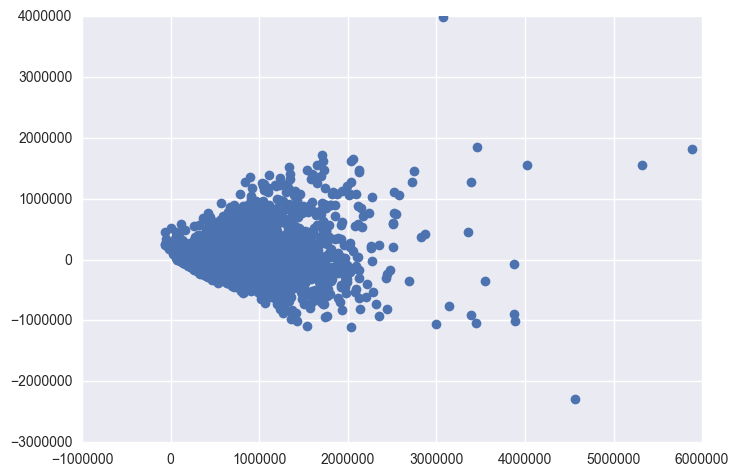

In [48]:
reg_prep(dataset_clean_temp)

### Tabled for Later

In [374]:
# create dummies for 0, 1, 2, 3, 4+ bedrooms
my_series = pd.Series()
count = 0

for i in dataset.bedrooms:
    if i >= 4:
        my_series = my_series.set_value(count, 4)
    else:
        my_series = my_series.set_value(count, i)
    
    count += 1

my_series = my_series.rename('bedrooms')

In [389]:
dataset_clean_temp.sqft_living = clean.mean_norm(dataset_clean_temp.sqft_living)

In [397]:
dataset_clean_temp = dataset_clean.copy(deep = True)

my_series = pd.Series()
count = 0

for i in dataset.floors:
    if i == 1.5:
        my_series = my_series.set_value(count, 1)
    elif i == 2.5:
        my_series = my_series.set_value(count, 2)
    elif i == 3.5:
        my_series = my_series.set_value(count, 3)
    else:
        my_series = my_series.set_value(count, i)
    
    count += 1

my_series = my_series.rename('floors')

In [398]:
col_name = 'floors'
variable_clean = clean.categorical_clean(my_series, False, True)
[dataset_clean_temp.insert(dataset_clean_temp.columns.get_loc(col_name), variable_clean.columns[i], variable_clean.ix[:,i]) for i in np.arange(len(variable_clean.columns))]
del dataset_clean_temp[col_name]

In [ ]:
dataset_clean_temp.sqft_above = clean.mean_norm(dataset_clean_temp.sqft_above)

In [ ]:
dataset_clean_temp.sqft_basement = clean.mean_norm(dataset_clean_temp.sqft_basement)

### Zipcode

In [362]:
uni.categorical_nrm(dataset.zipcode, total_count)


Number of categories: 70
+---------+-------+
| zipcode |       |
+---------+-------+
|   min   | 98001 |
|   max   | 98199 |
|  range  |  198  |
+---------+-------+
Missing values: 0
Series([], Name: zipcode, dtype: int64)


In [363]:
uni.categorical_c(dataset.zipcode, total_count)

       count    count%
98103    602  0.027854
98038    590  0.027298
98115    583  0.026975
98052    574  0.026558
98117    553  0.025586
98042    548  0.025355
98034    545  0.025216
98118    508  0.023504
98023    499  0.023088
98006    498  0.023042
98133    494  0.022857
98059    468  0.021654
98058    455  0.021052
98155    446  0.020636
98074    441  0.020404
98033    432  0.019988
98027    412  0.019063
98125    410  0.018970
98056    406  0.018785
98053    405  0.018739
98001    362  0.016749
98075    359  0.016610
98126    354  0.016379
98092    351  0.016240
98144    343  0.015870
98106    335  0.015500
98116    330  0.015269
98029    321  0.014852
98004    317  0.014667
98199    317  0.014667
...      ...       ...
98168    269  0.012446
98112    269  0.012446
98055    268  0.012400
98107    266  0.012307
98136    263  0.012169
98178    262  0.012122
98030    256  0.011845
98177    255  0.011798
98166    254  0.011752
98022    234  0.010827
98105    229  0.010595
98045    22

In [435]:
dataset_clean_temp = dataset_clean.copy(deep = True)

dataset_clean_temp.zipcode = pd.cut(dataset.zipcode, 4, labels=False)

col_name = 'zipcode'
variable_clean = clean.categorical_clean(dataset_clean_temp.zipcode, False, True)
[dataset_clean_temp.insert(dataset_clean_temp.columns.get_loc(col_name), variable_clean.columns[i], variable_clean.ix[:,i]) for i in np.arange(len(variable_clean.columns))]
del dataset_clean_temp[col_name]

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     960.8
Date:                Mon, 27 Feb 2017   Prob (F-statistic):               0.00
Time:                        21:25:38   Log-Likelihood:            -2.3439e+05
No. Observations:               17290   AIC:                         4.689e+05
Df Residuals:                   17238   BIC:                         4.693e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
constant       -3.503e+07   2.05e+06    -17.

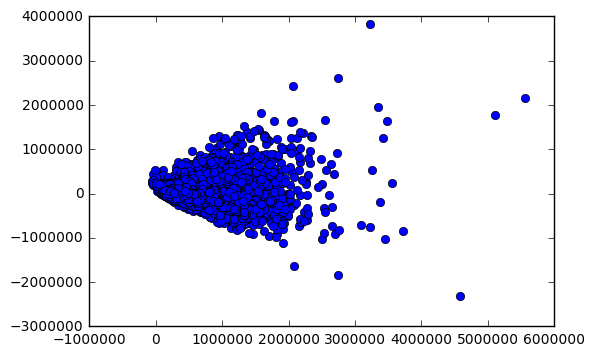

In [436]:
X = pd.DataFrame(dataset_clean_temp.iloc[:,1:])
y = pd.DataFrame(dataset_clean_temp.iloc[:,0])

X.insert(0, 'constant', 1)   # insert constant column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

lm_sm = sm.OLS(y_train, X_train).fit()
print lm_sm.summary()
plt.plot(lm_sm.fittedvalues, lm_sm.resid, 'o')   # residual plot

In [437]:
dataset_clean = dataset_clean_temp.copy(deep = True)

### Latitude

In [443]:
dataset_clean_temp = dataset_clean.copy(deep = True)

dataset_clean_temp.lat = pd.cut(dataset.lat, 8, labels=False)

col_name = 'lat'
variable_clean = clean.categorical_clean(dataset_clean_temp.lat, False, True)
[dataset_clean_temp.insert(dataset_clean_temp.columns.get_loc(col_name), variable_clean.columns[i], variable_clean.ix[:,i]) for i in np.arange(len(variable_clean.columns))]
del dataset_clean_temp[col_name]

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     1120.
Date:                Mon, 27 Feb 2017   Prob (F-statistic):               0.00
Time:                        21:27:41   Log-Likelihood:            -2.3288e+05
No. Observations:               17290   AIC:                         4.659e+05
Df Residuals:                   17232   BIC:                         4.663e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
constant       -1.827e+07   1.86e+06     -9.

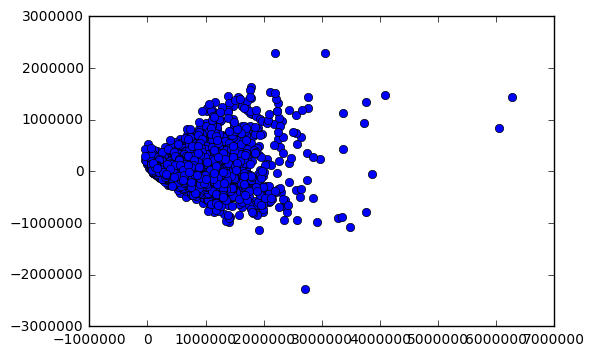

In [444]:
X = pd.DataFrame(dataset_clean_temp.iloc[:,1:])
y = pd.DataFrame(dataset_clean_temp.iloc[:,0])

X.insert(0, 'constant', 1)   # insert constant column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

lm_sm = sm.OLS(y_train, X_train).fit()
print lm_sm.summary()
plt.plot(lm_sm.fittedvalues, lm_sm.resid, 'o')   # residual plot

In [446]:
dataset_clean = dataset_clean_temp.copy(deep = True)

### Longitude

In [447]:
# deleted version is better :o
dataset_clean_temp = dataset_clean.copy(deep = True)

del dataset_clean_temp['long']

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     1075.
Date:                Mon, 27 Feb 2017   Prob (F-statistic):               0.00
Time:                        21:28:09   Log-Likelihood:            -2.3329e+05
No. Observations:               17290   AIC:                         4.667e+05
Df Residuals:                   17234   BIC:                         4.671e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
constant        3.844e+06   9.78e+04     39.

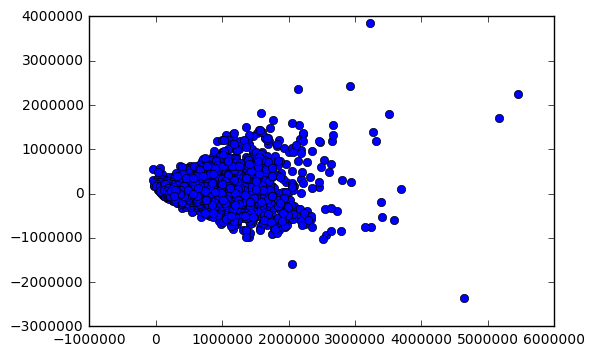

In [448]:
X = pd.DataFrame(dataset_clean_temp.iloc[:,1:])
y = pd.DataFrame(dataset_clean_temp.iloc[:,0])

X.insert(0, 'constant', 1)   # insert constant column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

lm_sm = sm.OLS(y_train, X_train).fit()
print lm_sm.summary()
plt.plot(lm_sm.fittedvalues, lm_sm.resid, 'o')   # residual plot

In [449]:
dataset_clean = dataset_clean_temp.copy(deep = True)

In [ ]:
# predict_sm = lm_sm.predict(X_test)
# predict_sm

### LinearRegression / sklearn

In [ ]:
#lm_skl = LinearRegression().fit(X_train, y_train)

In [ ]:
#print lm_skl.intercept_
#print lm_skl.coef_

In [ ]:
# could look into this b/c having names next to coefs would be best
# zip(X.columns, lm_skl.coef_)

In [ ]:
#lm_skl.predict(X_test)

Calculating the test error:

In [116]:
X = pd.DataFrame(dataset.iloc[:,1:])
y = pd.DataFrame(dataset.iloc[:,0])
    
X.insert(0, 'constant', 1)   # insert constant column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
lm_sm = sm.OLS(y_train, X_train).fit()
#print lm_sm.summary()

y_pred = pd.DataFrame()
y_pred['predictions'] = lm_sm.predict(X_test.sort_index())
y_pred['actual'] = y_test.sort_index().reset_index(drop=True)

i = 0
my_list = []
for row in y_pred['predictions']:
    my_list.extend([(row - y_pred.iloc[i,1]) ** 2])
    i = i + 1

print (1.0 / (2 * len(y_pred))) * sum(my_list)

19800079757.4
